In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_signals(df, title = "Signal Plot with Seaborn"):
    """
    Funkcija za prikaz signalov iz DataFrame-a z uporabo Seaborn.

    Args:
        df (pandas.DataFrame): DataFrame, ki vsebuje časovni stolpec ('time') in signale.
    """
    # Preoblikuj DataFrame v dolgo obliko za Seaborn
    df_melted = df.melt(id_vars="time", var_name="Signal", value_name="Value")
    
    # Ustvari graf z uporabo Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x="time", y="Value", hue="Signal", palette="tab10")
    
    # Nastavitve grafa
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
    plt.grid(True)
    plt.legend(title='Signals')
    plt.show()

# Klic funkcije za prikaz signalov
#plot_signals(generiraniSignali)

In [3]:
def generate_rand_signals(time, mu, std, N, distribution="normal", correlation=None):
    """
    Funkcija generira naključne podatke za N signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        N (int): Število signalov.
        distribution (str): Type of distribution ('normal', 'uniform', 'exponential').
        correlation (np.ndarray): Correlation matrix for individuals' pupil sizes.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """

    # Generate pupil size data based on distribution
    if distribution == "normal":
        if correlation is None:
            data = np.random.normal(mu, std, size=(len(time), N))
        else:
            cov_matrix = correlation * std**2
            data = np.random.multivariate_normal([mu] * N, cov_matrix, len(time))
    elif distribution == "uniform":
        data = np.random.uniform(mu - std, mu + std, size=(len(time), N))
    elif distribution == "exponential":
        data = np.random.exponential(scale=std, size=(len(time), N)) + mu
    else:
        raise ValueError("Unsupported distribution type. Choose 'normal', 'uniform', or 'exponential'.")
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    randomSignal_df = pd.DataFrame(data, columns=[f"signal_{i+1}" for i in range(N)])
    randomSignal_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    

    #sklearn knjižnica
    #scipy signal preveri ac, 
    return randomSignal_df

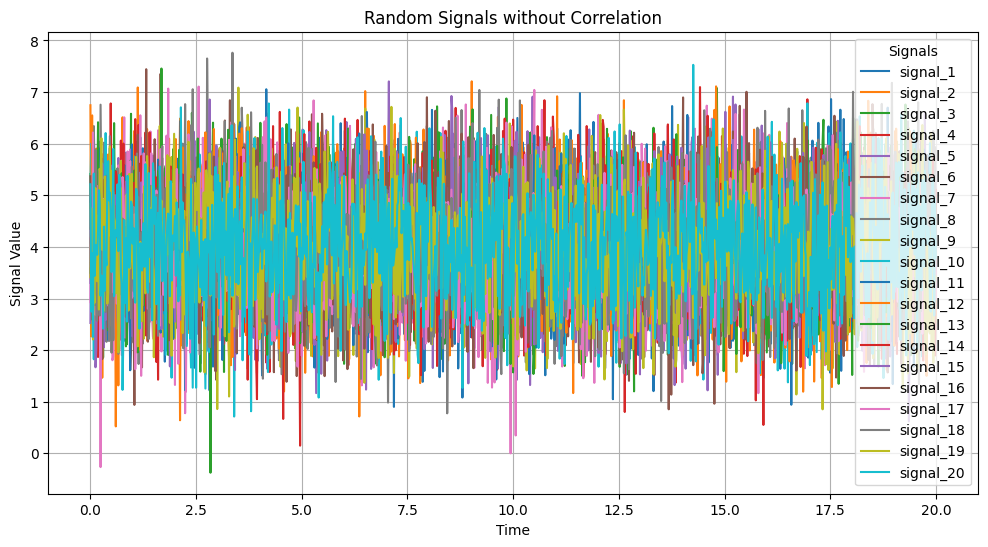

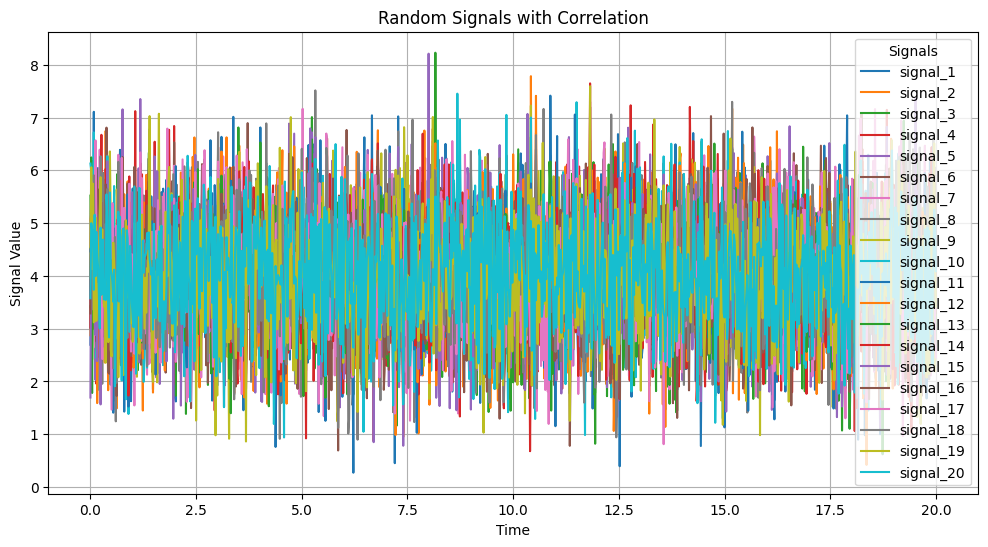

In [20]:
# Primer uporabe:
time = np.arange(0, 20.02, 0.02)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 1                           # Standardni odklon
N = 20                            # Število signalov

# Generiraj podatke
random_signals = generate_rand_signals(time=time, mu=mu, std=std, N=N)
plot_signals(random_signals, title="Random Signals without Correlation")

correlation_matrix = np.eye(N) * 0.8 + 0.2  # Korelacijska matrika z delno korelacijo med posamezniki
signals_with_corr = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
plot_signals(signals_with_corr, title="Random Signals with Correlation")

# correlation_matrix = np.eye(N) * 0.95 + 0.5  # Korelacijska matrika z delno korelacijo med posamezniki
# signals_with_corr_strong = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
# plot_signals(signals_with_corr_strong, title="Random Signals with Strong Correlation")

# correlation_matrix = np.eye(N) * 0.5 + 0.1  # Korelacijska matrika z delno korelacijo med posamezniki
# signals_with_corr_weak = generate_rand_signals(time=time, mu=mu, std=std, N=N, correlation=correlation_matrix)
# plot_signals(signals_with_corr_weak, title="Random Signals with Weak Correlation")

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1', 'columns': {'person_1': {'sdtype': 'numerical'}, 'person_2': {'sdtype': 'numerical'}, 'person_3': {'sdtype': 'numerical'}, 'person_4': {'sdtype': 'numerical'}, 'person_5': {'sdtype': 'numerical'}, 'person_6': {'sdtype': 'numerical'}, 'person_7': {'sdtype': 'numerical'}, 'person_8': {'sdtype': 'numerical'}, 'person_9': {'sdtype': 'numerical'}, 'person_10': {'sdtype': 'numerical'}, 'person_11': {'sdtype': 'numerical'}, 'person_12': {'sdtype': 'numerical'}, 'person_13': {'sdtype': 'numerical'}, 'person_14': {'sdtype': 'numerical'}, 'person_15': {'sdtype': 'numerical'}, 'person_16': {'sdtype': 'numerical'}, 'person_17': {'sdtype': 'numerical'}, 'person_18': {'sdtype': 'numerical'}, 'person_19': {'sdtype': 'numerical'}, 'person_20': {'sdtype': 'numerical'}, 'person_21': {'sdtype': 'numerical'}, 'person_22': {'sdtype': 'numerical'}, 'person_23': {'sdtype': 'numerical'}, 'person_24': {'sdtype': 'numerical'}, 'person_25': {'sdtype': 'numerical'}, 'p

c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


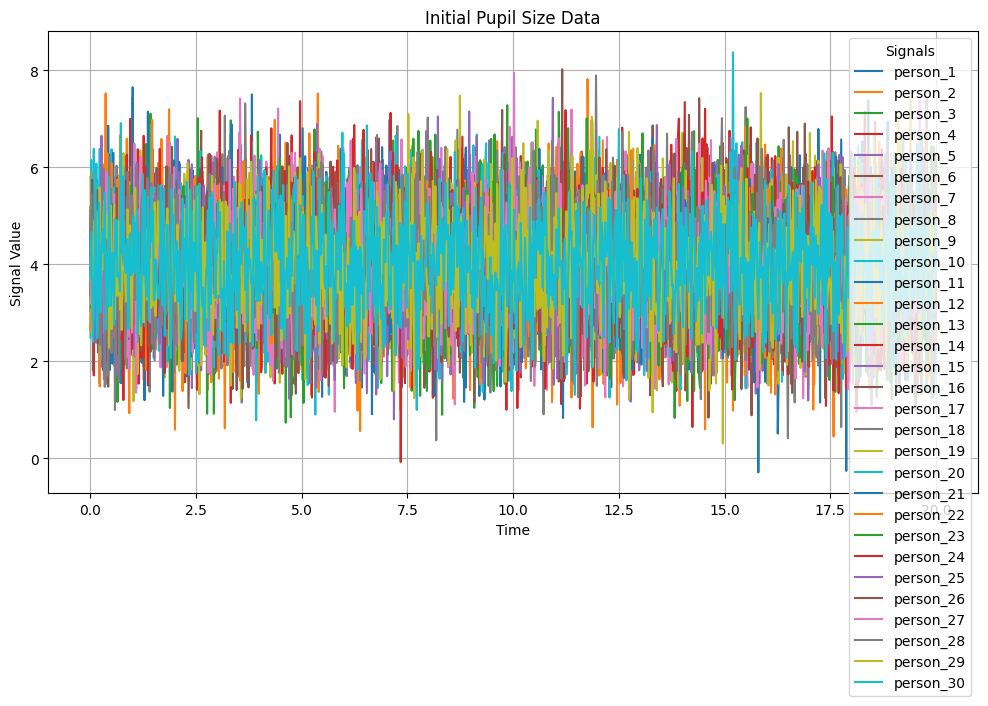

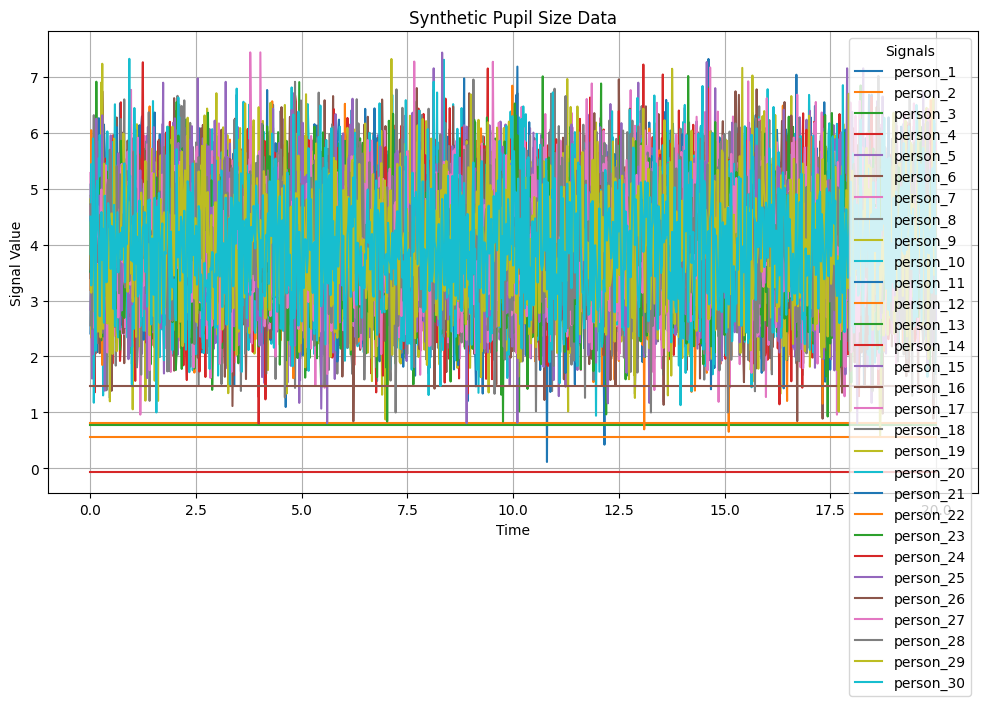

In [5]:
# Generiranje podatkov s pomočjo SDV knjižnice, ki potrebuje metapodatke oz. realne podatke an katerih se "nauči" lastnosti
# v tem primeru sem jih generiral sam p.random.normal
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
import numpy as np

# Priprava začetnih podatkov za učenje (simulirani podatki)
num_individuals = 30  # Število oseb (stolpcev)
num_samples = 1001  # Število časovnih točk (vrstic)

mean_pupil_size = 4.0  # Povprečna velikost zenice
std_pupil_size = 1.0   # Standardni odklon velikosti zenice

# Simuliraj začetne podatke z normalno porazdelitvijo!!! PROBLEM, KER MORAMO PONOVNO GENERIRATI PODATKE!!!
initial_data = pd.DataFrame({
    f"person_{i+1}": np.random.normal(mean_pupil_size, std_pupil_size, num_samples)  # Velikost zenice
    for i in range(num_individuals)
})


# Definicija metapodatkov za sintetične podatke
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=initial_data)  # Samodejno zaznavanje metapodatkov
print(metadata.to_dict())

# Validacija metapodatkov glede na začetne podatke
#metadata.validate_table(initial_data)

# Inicializacija Gaussian Copula sintetizatorja
synthesizer = GaussianCopulaSynthesizer(metadata)

# Treniranje sintetizatorja na začetnih podatkih
synthesizer.fit(initial_data)

# Generiranje sintetičnih podatkov
synthetic_data = synthesizer.sample(num_rows=1001)
synthetic_data.insert(0, "time", np.arange(0, 20.02, 0.02) )  # Dodaj časovni stolpec


initial_data.insert(0, "time", np.arange(0, 20.02, 0.02))  # Dodaj časovni stolpec
plot_signals(initial_data, title="Initial Pupil Size Data")

# Prikaz sintetičnih podatkov
#print(synthetic_data.head())
plot_signals(synthetic_data, title="Synthetic Pupil Size Data")



In [6]:
# Izračun podobnosti med začetnimi in sintetičnimi podatki generiranimi z uporabo SDV knjižnice
import numpy as np
from sklearn.metrics import mean_squared_error


# Izračun podobnosti z uporabo MSE
mse_values = {}
for column in initial_data.columns[1:]:  # Preskoči stolpec 'time'
    mse = mean_squared_error(initial_data[column], synthetic_data[column])
    mse_values[column] = mse

# Izračun povprečnega MSE čez vse stolpce
average_mse = np.mean(list(mse_values.values()))

# Prikaz rezultatov
#print("MSE za posamezne stolpce:", mse_values)
print("Povprečni MSE:", average_mse)

Povprečni MSE: 3.660264401224963


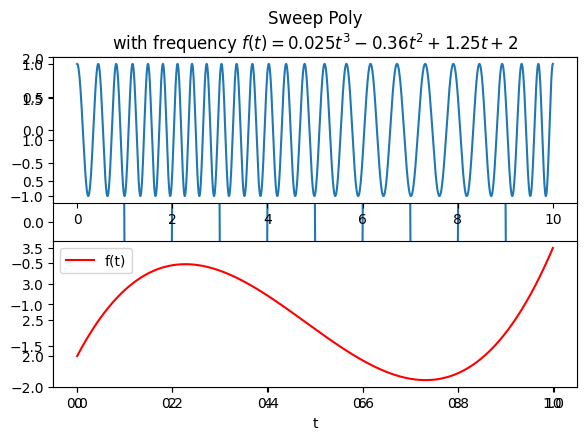

In [7]:
# preizkus možnosti scipy.signal ki je namenjen bolj za obdelavo signalov...
#TODO: odstrani, ker je samo za testiranje generiranja ss scipy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

import numpy as np
from scipy.signal import sweep_poly
p = np.poly1d([0.025, -0.36, 1.25, 2.0])
t = np.linspace(0, 10, 5001)
w = sweep_poly(t, p)

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.title("Sweep Poly\nwith frequency " +
          "$f(t) = 0.025t^3 - 0.36t^2 + 1.25t + 2$")
plt.subplot(2, 1, 2)
plt.plot(t, p(t), 'r', label='f(t)')
plt.legend()
plt.xlabel('t')
plt.tight_layout()
plt.show()

In [8]:
# Preizkus orodja pyCANON za anonimizacijo podatkov - pyCANON 
# is a Python library which allows the user to know the anonymity level of a dataset 
# based on a set of quasi-identifiers (QI), and a set of sensitive attributes. 


import pandas as pd
from pycanon import anonymity, report

FILE_NAME = "data/adult.csv"
QI = ["age", "education", "occupation", "relationship", "sex", "native-country"]  # Quasi-identifiers
SA = ["salary-class"]
DATA = pd.read_csv(FILE_NAME)
DATA.columns = DATA.columns.str.strip()


# Calculate k for k-anonymity:
k = anonymity.k_anonymity(DATA, QI)

# Print the anonymity report:
report.print_report(DATA, QI, SA)

c for (c,l)-diversity cannot be calculated as l=1
The dataset verifies:
          	 - k-anonymity with k = 1
          	 - (alpha,k)-anonymity with alpha = 1.0 and k = 1
          	 - l-diversity with l = 1
          	 - entropy l-diversity with l = 1
          	 - (c,l)-diversity with c = nan and l = 1
          	 - basic beta-likeness with beta = 3.152659099604642
          	 - enhanced beta-likeness with beta = 1.423748875944647
          	 - t-closeness with t = 0.7591904425539756
          	 - delta-disclosure privacy with delta = 2.98259391741754


In [9]:
# preizkus anoniomizacije z uporabo anjana knjižnice
# Anjana is a Python library for data anonymization. It provides functions to 
# apply k-anonymity, l-diversity and t-closeness to a dataset.
import pandas as pd
import anjana
from anjana.anonymity import k_anonymity, l_diversity, t_closeness

# Read and process the data
data = pd.read_csv("data/adult.csv") 
data.columns = data.columns.str.strip()
cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "sex",
    "native-country",
]
for col in cols:
    data[col] = data[col].str.strip()

# Define the identifiers, quasi-identifiers and the sensitive attribute
quasi_ident = [
    "age",
    "education",
    "marital-status",
    "occupation",
    "sex",
    "native-country",
]
ident = ["race"]
sens_att = "salary-class"

# Select the desired level of k, l and t
k = 10
l_div = 2
t = 0.5

# Select the suppression limit allowed
supp_level = 50

# Import the hierarquies for each quasi-identifier. Define a dictionary containing them
hierarchies = {
    "age": dict(pd.read_csv("data/hierarchies/age.csv", header=None)),
    "education": dict(pd.read_csv("data/hierarchies/education.csv", header=None)),
    "marital-status": dict(pd.read_csv("data/hierarchies/marital.csv", header=None)),
    "occupation": dict(pd.read_csv("data/hierarchies/occupation.csv", header=None)),
    "sex": dict(pd.read_csv("data/hierarchies/sex.csv", header=None)),
    "native-country": dict(pd.read_csv("data/hierarchies/country.csv", header=None)),
}

# Apply the three functions: k-anonymity, l-diversity and t-closeness
data_anon = k_anonymity(data, ident, quasi_ident, k, supp_level, hierarchies)
# data_anon = l_diversity(
#     data_anon, ident, quasi_ident, sens_att, k, l_div, supp_level, hierarchies
# )
# data_anon = t_closeness(
#     data_anon, ident, quasi_ident, sens_att, k, t, supp_level, hierarchies
# )



In [10]:
# Save the anonymized data
# data_anon.to_csv("data/anonymized_data.csv", index=False)

# kaj se zgodi: podatki so anonimizirani na način, da so vrrednosti postavljene v neko kategorijo, ki je definirana v hierarhiji
# npr. bachelor, master, phd so združeni v eno kategorijo education: high_education

In [11]:
from pycanon import anonymity

data = pd.DataFrame({
    "age": [34, 45, 66],
    "income": [50000, 60000, 70000],
})

k = anonymity.k_anonymity(data, ["age"])
print(f"k-anonymity: {k}")

k-anonymity: 1


In [12]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)
model = GaussianCopulaSynthesizer(metadata=metadata)
model.fit(data)
synthetic_data = model.sample(num_rows=100)
#print(synthetic_data)

synthetic_data["income"] = pd.cut(synthetic_data["income"], bins=[0, 50000, 60000, 100000], labels=["low", "mid", "high"])
# Generalizirajte starost v desetletja
synthetic_data["age_group"] = pd.cut(
    synthetic_data["age"], 
    bins=[30, 40, 50, 60, 70],
    labels=["30-40", "40-50", "50-60", "60-70"]
)

print(synthetic_data)
k = anonymity.k_anonymity(synthetic_data, ["income", "age_group"])
print(f"k-anonymity: {k}")


    age income age_group
0    58   high     50-60
1    54   high     50-60
2    57   high     50-60
3    38   high     30-40
4    34    mid     30-40
..  ...    ...       ...
95   59   high     50-60
96   34    mid     30-40
97   37    mid     30-40
98   38    mid     30-40
99   34    mid     30-40

[100 rows x 3 columns]
k-anonymity: 3


c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
c:\Users\Leon\OneDrive - Univerza v Ljubljani\Documents\Fe\MAGISTRSKA\koda\.venv\Lib\site-packages\pycanon\anonymity\utils\aux_anonymity.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = data.groupby(by=quasi_ident)


In [21]:
def anonymize_signals(originalni_signali_df, method_code, method_parameters):
    """
    Funkcija za anonimizacijo signalov.

    Args:
        originalni_signali_df (pandas.DataFrame): DataFrame z originalnimi signali (vključuje stolpec 'time').
        method_code (str): Koda metode za anonimizacijo ('quant' za kvantizacijo).
        method_parameters (dict): Parametri metode {'min': 0, 'max': 10, 'dif': 0.2}.

    Returns:
        anonimizirani_signali_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.
    """
    anonimizirani_signali_df = originalni_signali_df.copy()

    # Podvzorčenje
    subsample_rate = method_parameters.get('subsample_rate', 1)
    anonimizirani_signali_df = anonimizirani_signali_df.iloc[::subsample_rate].reset_index(drop=True)

    if method_code == 'quant':
        min_val = method_parameters.get('min', 0)
        max_val = method_parameters.get('max', 10)
        dif = method_parameters.get('dif', 0.2)
        #     for column in anonimizirani_signali_df.columns[1:]:
        #         anonimizirani_signali_df[column] = np.round((anonimizirani_signali_df[column] - min_val) / step) * step + min_val
        #         # Omeji vrednosti na [min, max]
        #         anonimizirani_signali_df[column] = np.clip(anonimizirani_signali_df[column], min_val, max_val)

        anonimizirani_signali_df.iloc[:, 1:] = np.round((anonimizirani_signali_df.iloc[:, 1:] - min_val) / dif) * dif + min_val
        #kvantizacija signal knjižnica?
        
        # Omeji vrednosti na [min, max]
        anonimizirani_signali_df.iloc[:, 1:] = np.clip(anonimizirani_signali_df.iloc[:, 1:], min_val, max_val)
    
    elif method_code == 'white_noise':
        std = method_parameters.get('std', 0.5)
        for column in anonimizirani_signali_df.columns[1:]:
            anonimizirani_signali_df[column] = anonimizirani_signali_df[column] + np.random.normal(0, std, len(anonimizirani_signali_df))

    return anonimizirani_signali_df


       time  signal_1  signal_2  signal_3  signal_4  signal_5  signal_6  \
0      0.00       2.5       3.0       3.5       3.5       3.5       3.0   
1      0.02       6.0       5.5       6.0       5.0       4.0       4.5   
2      0.04       3.0       3.5       4.0       5.0       4.0       4.5   
3      0.06       4.0       5.0       6.0       4.5       4.0       4.0   
4      0.08       7.0       4.5       5.0       3.0       4.0       4.0   
...     ...       ...       ...       ...       ...       ...       ...   
996   19.92       4.5       3.5       3.0       4.5       5.0       3.0   
997   19.94       3.5       6.0       2.5       3.5       3.0       6.0   
998   19.96       4.0       5.0       4.5       4.5       5.0       4.5   
999   19.98       5.0       3.5       4.5       5.0       4.5       4.5   
1000  20.00       4.5       4.0       4.0       3.5       4.5       2.5   

      signal_7  signal_8  signal_9  ...  signal_11  signal_12  signal_13  \
0          3.5       4.

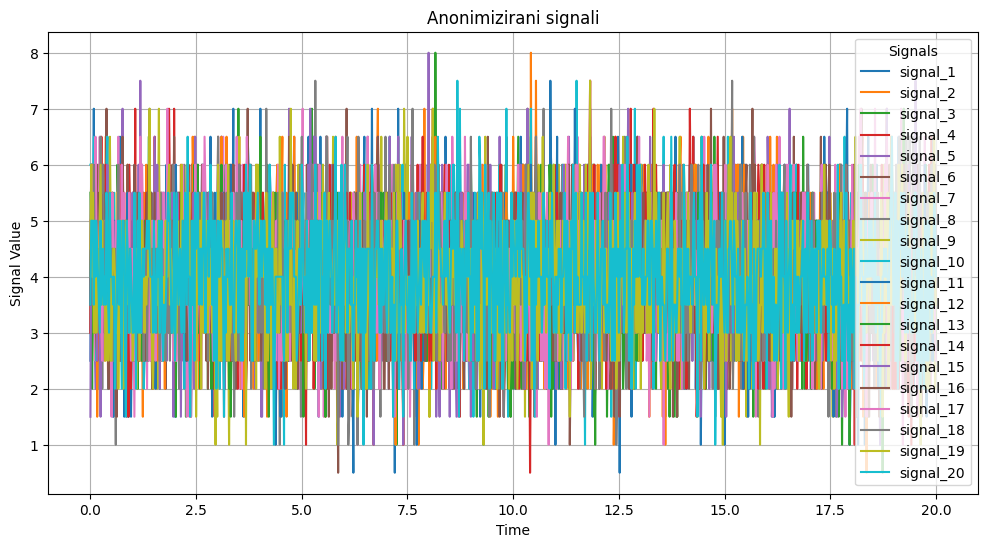

In [28]:
# Anonimizacija podatkov
meth_code = 'quant'
meth_pars = {'min': 0, 'max': 10, 'dif': 0.5}
Y_df = anonymize_signals(signals_with_corr, meth_code, meth_pars)

# Prikaz rezultatov
print(Y_df)
plot_signals(Y_df, 'Anonimizirani signali')

In [23]:
def anonim_count(X_df, Y_df):
    """
    Funkcija za izračun števila anonimiziranih vrednosti.

    TODO:
    original - anonimiziraj signal potem primerjaj
    Preveri kako knjižnica naredi


    Args:
        X_df (pandas.DataFrame): DataFrame z originalnimi signali. GA TRENUTNO NE UPORABLJAM!!!
        Y_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.

    Returns: 
        pandas.DataFrame: Tabela z signal_ID in številom signalov, ki gredo skozi enake razrede anonimizaicije.
    """
    results = []
    for column in Y_df.columns[1:]:
        count = 0
        for column2 in Y_df.columns[1:]:
            if (Y_df[column] == Y_df[column2]).all():
                count += 1 
        results.append({'signal_ID': column, 'count': count})
    
    result_df = pd.DataFrame(results)
    return result_df


In [ ]:
import pandas as pd
import numpy as np

def anonim_count_new(X_df, Y_df):
    """
    Funkcija za izračun števila anonimiziranih vrednosti.

    Args:
        X_df (pandas.DataFrame): DataFrame z originalnimi signali.
        Y_df (pandas.DataFrame): DataFrame z anonimiziranimi signali.

    Returns: 
        pandas.DataFrame: Tabela z signal_ID in številom signalov, ki gredo skozi enake razrede anonimizacije.
    """
    meth_code = 'quant'
    meth_pars = {'min': 0, 'max': 10, 'dif': 0.5}
    anonimizirani_original = anonymize_signals(X_df, meth_code, meth_pars)

    results = []

    for column in anonimizirani_original.columns[1:]:
        count = 0
        for column2 in X_df.columns[1:]:
            if (anonimizirani_original[column] == Y_df[column2]).all():
                count += 1 
        results.append({'signal_ID': column, 'count': count})
    
    result_df = pd.DataFrame(results)
    return result_df

In [44]:
print(signals_with_corr.iloc[:, :3])
print("\n **** \n")
print(Y_df.iloc[:, :3])
anonim_count_new(signals_with_corr, Y_df)

       time  signal_1  signal_2
0      0.00  2.695813  2.876365
1      0.02  5.755422  5.739029
2      0.04  3.116969  3.387027
3      0.06  4.017283  4.857376
4      0.08  7.109937  4.577244
...     ...       ...       ...
996   19.92  4.374125  3.462277
997   19.94  3.718744  6.043468
998   19.96  4.226091  4.879849
999   19.98  5.055454  3.352870
1000  20.00  4.487832  3.957083

[1001 rows x 3 columns]

 **** 

       time  signal_1  signal_2
0      0.00       2.5       3.0
1      0.02       6.0       5.5
2      0.04       3.0       3.5
3      0.06       4.0       5.0
4      0.08       7.0       4.5
...     ...       ...       ...
996   19.92       4.5       3.5
997   19.94       3.5       6.0
998   19.96       4.0       5.0
999   19.98       5.0       3.5
1000  20.00       4.5       4.0

[1001 rows x 3 columns]
       time  signal_1  signal_2  signal_3  signal_4  signal_5  signal_6  \
0      0.00       2.5       3.0       3.5       3.5       3.5       3.0   
1      0.02       6.0  

,signal_ID,count
0,signal_1,1
1,signal_2,1
2,signal_3,1
3,signal_4,1
4,signal_5,1
5,signal_6,1
6,signal_7,1
7,signal_8,1
8,signal_9,1
9,signal_10,1


In [24]:
# Primer uporabe funkcije
anonim_count_results = anonim_count(Y_df, Y_df)
print(anonim_count_results)

    signal_ID  count
0    signal_1      1
1    signal_2      1
2    signal_3      1
3    signal_4      1
4    signal_5      1
5    signal_6      1
6    signal_7      1
7    signal_8      1
8    signal_9      1
9   signal_10      1
10  signal_11      1
11  signal_12      1
12  signal_13      1
13  signal_14      1
14  signal_15      1
15  signal_16      1
16  signal_17      1
17  signal_18      1
18  signal_19      1
19  signal_20      1


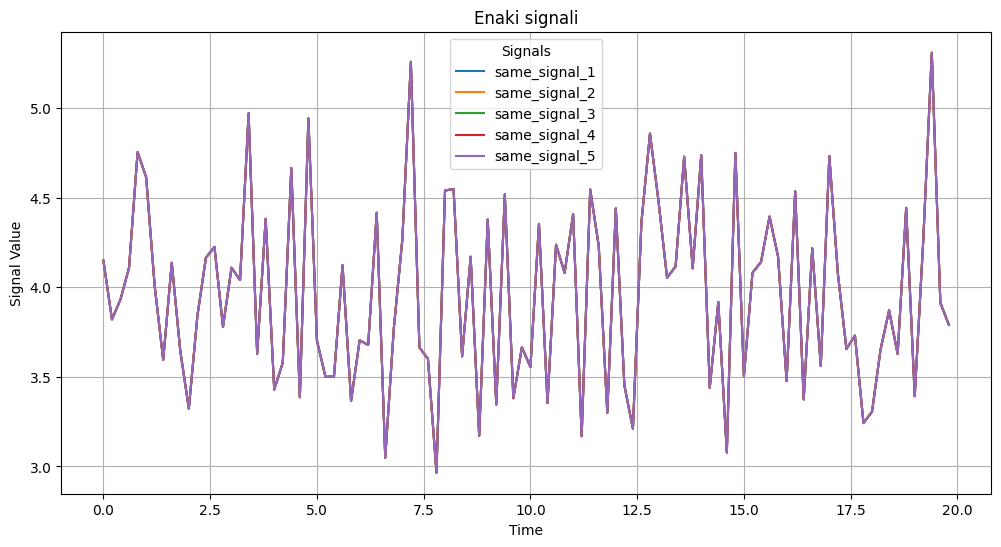

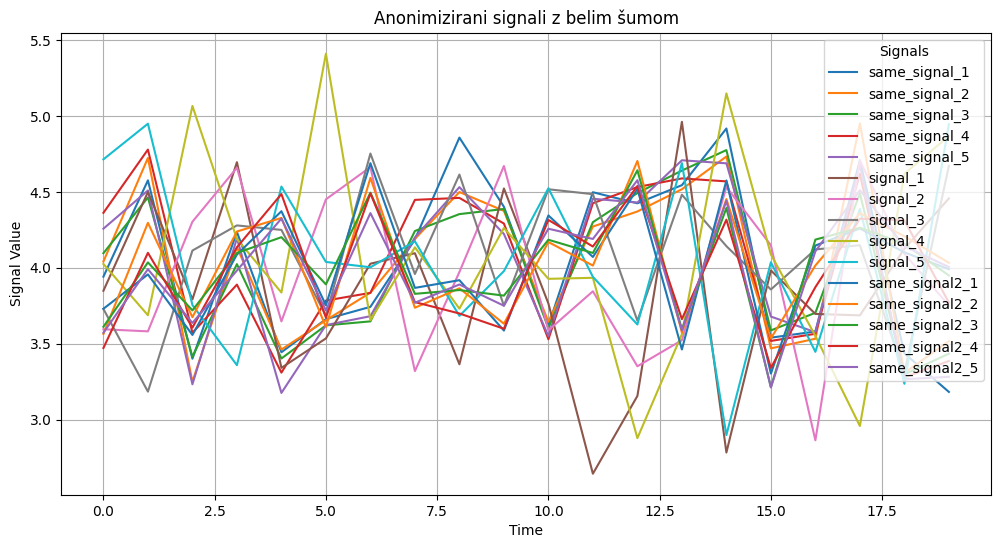

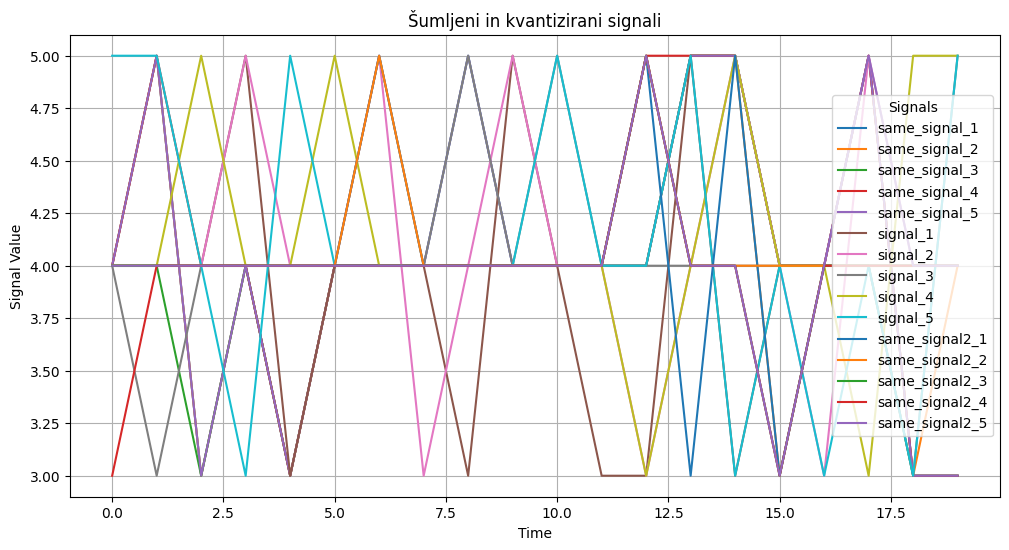

,signal_ID,count
0,same_signal_1,2
1,same_signal_2,1
2,same_signal_3,1
3,same_signal_4,1
4,same_signal_5,2
5,signal_1,1
6,signal_2,1
7,signal_3,1
8,signal_4,1
9,signal_5,1


In [ ]:
# Generiranje enakih signalov, za testiranje
def generate_same_signals(time, mu, std, ac, N):
    """
    Funkcija generira N enakih naključnih signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj en naključni signal iz normalne porazdelitve
    single_signal = np.random.normal(mu, std, size=len(time))
    
    # Ustvari matriko z N kopijami tega signala
    data = np.tile(single_signal, (N, 1)).T
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    sameSignals_df = pd.DataFrame(data, columns=[f"same_signal_{i+1}" for i in range(N)])
    sameSignals_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return sameSignals_df

def generate_same_signals2(time, mu, std, ac, N):
    """
    Funkcija generira N enakih naključnih signalov glede na podane parametre.

    Args:
        time (numpy array): Časovni intervali (npr. np.arange(0, 20, 0.02)).
        mu (float): Povprečje za generiranje naključnih vrednosti.
        std (float): Standardni odklon za generiranje naključnih vrednosti.
        ac (float): Korelacija med signali (trenutno ne uporabljeno).
        N (int): Število signalov.

    Returns:
        pandas.DataFrame: DataFrame s časovnimi intervali in generiranimi signali.
    """
    # Generiraj en naključni signal iz normalne porazdelitve
    single_signal = np.random.normal(mu, std, size=len(time))
    
    # Ustvari matriko z N kopijami tega signala
    data = np.tile(single_signal, (N, 1)).T
    
    # Pretvori v DataFrame in dodaj časovni stolpec
    sameSignals_df = pd.DataFrame(data, columns=[f"same_signal2_{i+1}" for i in range(N)])
    sameSignals_df.insert(0, "time", time)  # Dodaj stolpec 'time' na prvo mesto
    
    return sameSignals_df

time = np.arange(0, 20.00, 0.2)  # Časovni intervali od 0 do 20 s korakom 0.02
mu = 4                            # Povprečje
std = 0.5                           # Standardni odklon
ac = 0                            # Korelacija (trenutno ni uporabljena)
N = 5                           # Število signalov

same_signals_df = generate_same_signals(time, mu, std, ac, N)
same_signals_df_2 = generate_same_signals2(time, 4, 0.4, ac, 5)
random_signal_df = generate_rand_signals(time, mu, std, ac, N)

#plot_signals(random_signal_df)
plot_signals(same_signals_df, 'Enaki signali')
zdruzeni_signali = pd.concat([same_signals_df, random_signal_df.iloc[:, 1:], same_signals_df_2.iloc[:,1:]], axis=1)
#plot_signals(zdruzeni_signali)

meth_pars = {
    'min': 3, 
    'max': 4, 
    'dif': 2, 
    'std': 0.1,
    'subsample_rate': 5  # Vzame vsako peto meritev
} 
signali_s_sumom = anonymize_signals(zdruzeni_signali, 'white_noise', meth_pars)
plot_signals(signali_s_sumom, 'Anonimizirani signali z belim šumom')

anonimizirani_in_kvant = anonymize_signals(signali_s_sumom, 'quant', {'min': 3, 'max': 5, 'dif': 1})
plot_signals(anonimizirani_in_kvant, 'Šumljeni in kvantizirani signali')
anonim_count(zdruzeni_signali, anonimizirani_in_kvant)
